<a href="https://colab.research.google.com/github/Akanksha546/notebook2/blob/main/Gaussian_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gaussian Distribution curve using make_blobs**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


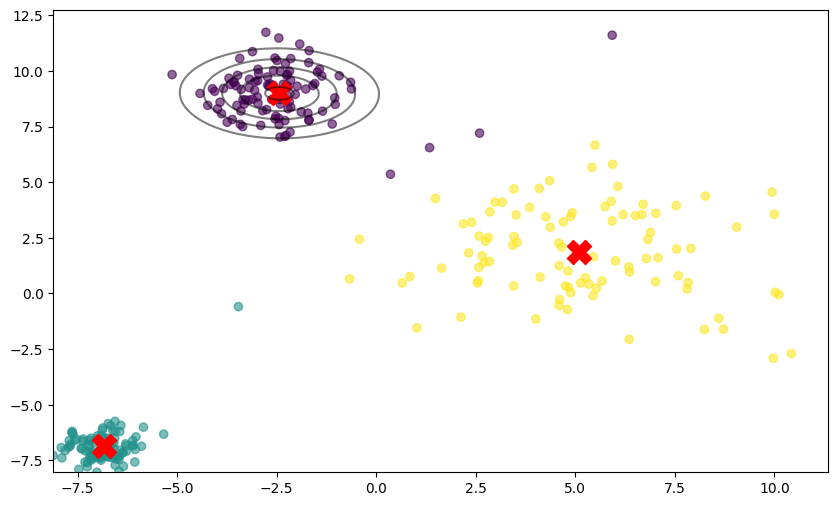

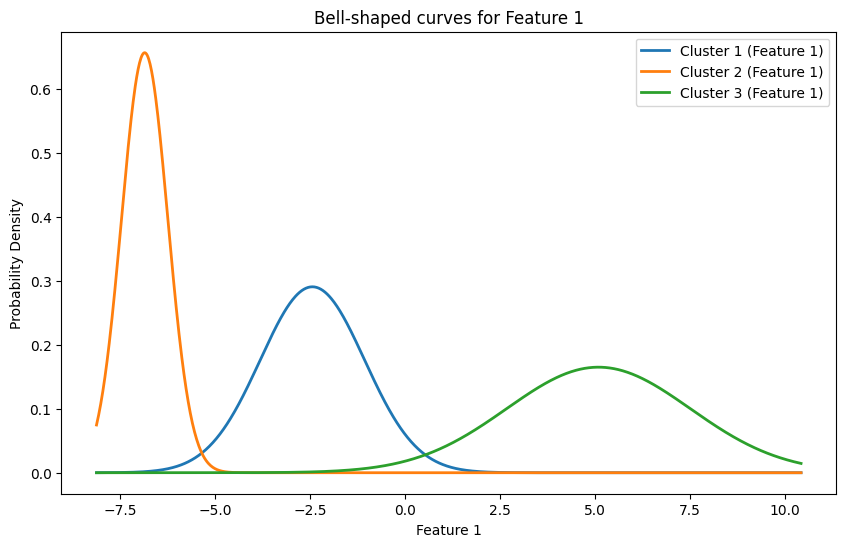

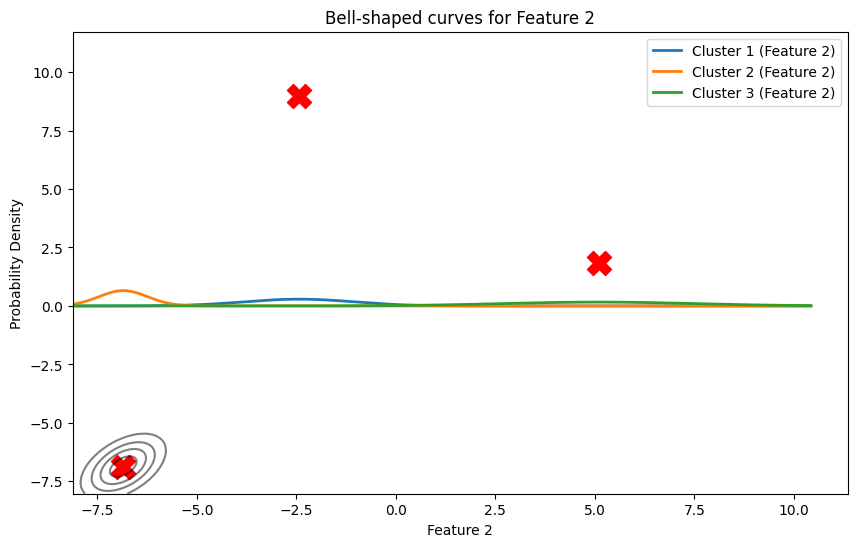

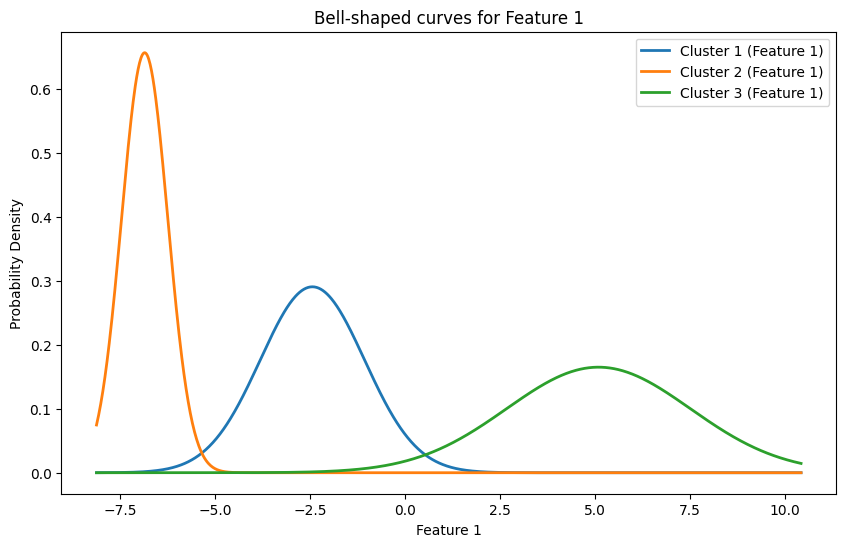

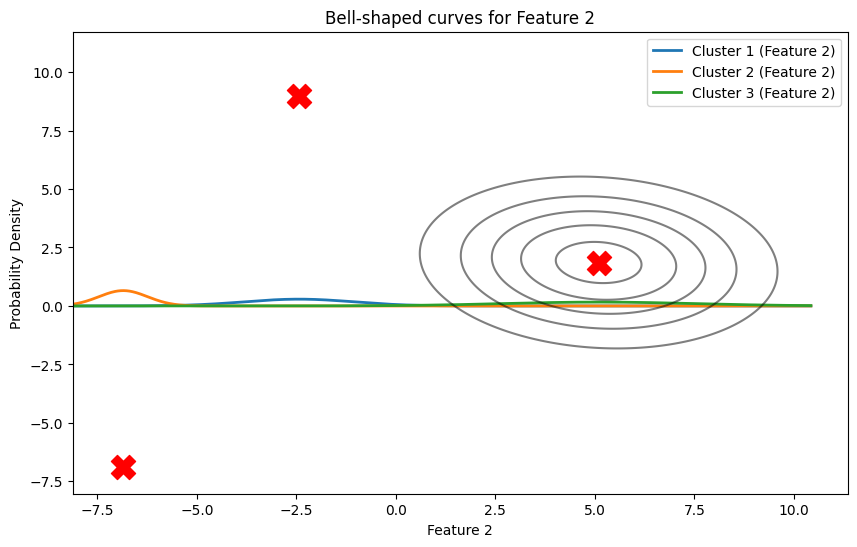

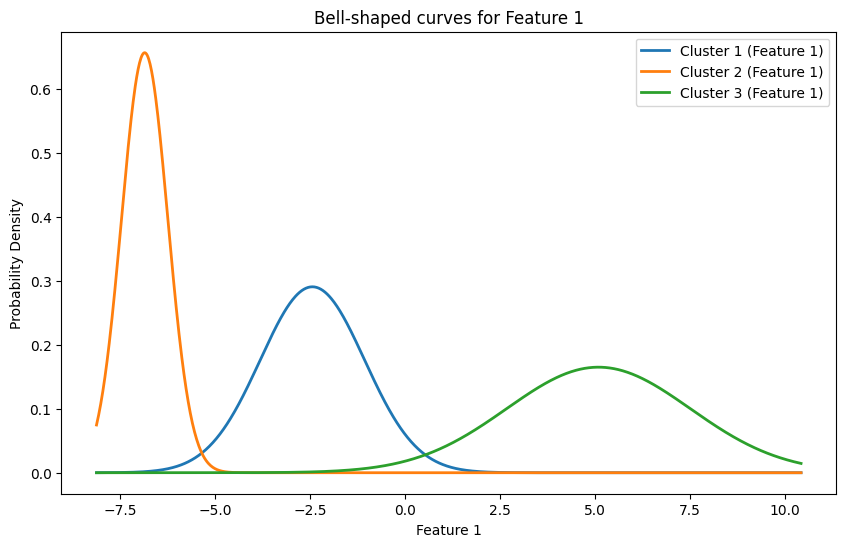

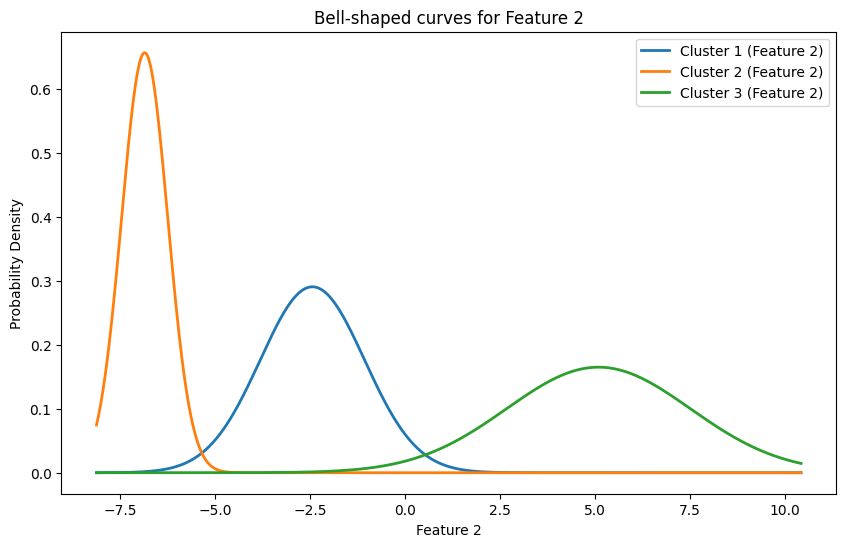

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.stats import norm, multivariate_normal

#generate synthetic data with gaussian blobs
n_samples = 300
n_features=2
centers = 3
cluster_std = [1.0,2.5,0.5]
X,y = make_blobs(n_samples=n_samples,n_features=n_features, centers=centers,cluster_std=cluster_std, random_state=42)
#K-means clustering
kmeans=KMeans(n_clusters=centers,random_state=42)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

#plot clustered data points
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='viridis',alpha=0.6)

 #plot gaussian distribution for each cluster
for i in range(centers):
  points=X[y_kmeans==i]
  mean=points.mean(axis=0)
  cov=np.cov(points.T)
  rv=multivariate_normal(mean=mean,cov=cov)
  x,y=np.mgrid[min(X[:,0]):max(X[:,0]):.01,min(X[:,1]):max(X[:,1]):.01]
  pos=np.dstack((x,y))
  plt.contour(x,y,rv.pdf(pos),levels=5,colors='black',alpha=0.5)

  #plot cluster centers
  plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,marker='X',c='red')

  #marginal distributions (bell-shaped curves)
  #Feature 1
  plt.figure(figsize=(10,6))
  for i in range(centers):
    points=X[y_kmeans==i]
    mean=points.mean(axis=0)[0]
    std_dev=points.std(axis=0)[0]
    x=np.linspace(min(X[:,0]),max(X[:,0]),1000)
    y=norm.pdf(x,mean,std_dev)
    plt.plot(x,y,label=f'Cluster {i+1} (Feature 1)',linewidth=2)
  plt.title('Bell-shaped curves for Feature 1')
  plt.xlabel('Feature 1')
  plt.ylabel('Probability Density')
  plt.legend()

  #Feature 2
  plt.figure(figsize=(10,6))
  for i in range(centers):
    points=X[y_kmeans==i]
    mean=points.mean(axis=0)[0]
    std_dev=points.std(axis=0)[0]
    x=np.linspace(min(X[:,0]),max(X[:,0]),1000)
    y=norm.pdf(x,mean,std_dev)
    plt.plot(x,y,label=f'Cluster {i+1} (Feature 2)',linewidth=2)
  plt.title('Bell-shaped curves for Feature 2')
  plt.xlabel('Feature 2')
  plt.ylabel('Probability Density')
  plt.legend()

